<div> 
<h1>Audio con Python</h1>
</div>

<p>
Este cuaderno trata algunas opciones para leer y escribir <strong>archivos de audio</strong> en Python, usando diferentes paquetes.
</p>     

## LibROSA

Una opcion es recurrir a las funciones de librosa [`librosa.load`](https://librosa.org/doc/latest/generated/librosa.load.html?highlight=load) y `librosa.output.write_wav`. 

* Por defecto, `librosa.load` remuestrea el audio a 22050 Hz. Al fijar `sr=None` conservamos la tasa de muestreo nativa.
* El audio cargado se convierte a reales en el rango $[-1,1]$.
* `librosa.load` es capaz de leer archivos mp3 siempre que [`ffmpeg`](https://ffmpeg.org/) se encuentre disponible.
* `librosa.output.write_wav` emplea el tipo de dato correspondiente a un vector numpy (por ejemplo 64-bit float).

archivo WAV:  Fs = 11025, x.shape = (45504,), x.dtype = float32


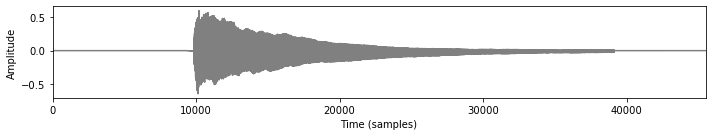

/home/ale/miniconda3/envs/FMP/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


archivo MP3:  Fs = 11025, x.shape = (47232,), x.dtype = float32


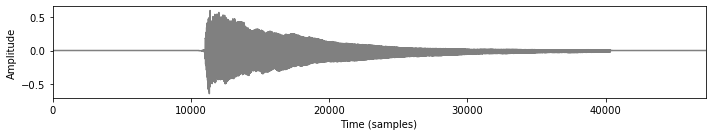

In [6]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

def print_plot_play(x,Fs,text=''):

    """1. Prints information about an audio singal
       2. Plots the waveform
       3. Creates player
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text,Fs,x.shape,x.dtype))
    plt.figure(figsize=(10,2))
    plt.plot(x,color='gray')
    plt.xlim([0,x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x,rate=Fs))

# Read wav
fn_wav = os.path.join('..','data','B','FMP_B_Note-C4_Piano.wav')
x,Fs = librosa.load(fn_wav,sr=None)
print_plot_play(x=x,Fs=Fs,text='archivo WAV: ')

# Read mp3
fn_mp3 = os.path.join('..','data','B','FMP_B_Note-C4_Piano.mp3')
x,Fs = librosa.load(fn_mp3,sr=None)
print_plot_play(x=x,Fs=Fs,text='archivo MP3: ')

Señal generada:  Fs = 8000, x.shape = (8000,), x.dtype = float64


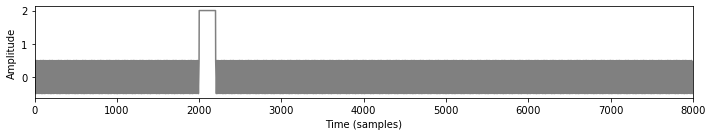

Señal post escritura y lectura:  Fs = 8000, x.shape = (8000,), x.dtype = float32


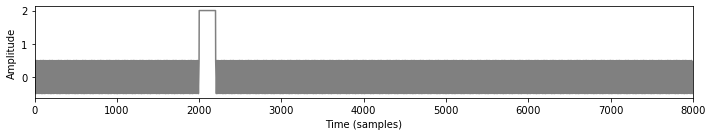

In [7]:
# Generate signal
Fs = 8000
t = np.arange(0,Fs)/Fs
x = 0.5*np.cos(2*np.pi*440*t)
x[2000:2200] = 2
print_plot_play(x=x,Fs=Fs,text='Señal generada: ')

# Write signal as wav 
fn_out = os.path.join('..','output','B','FMP_B_PythonAudio_sine.wav')
librosa.output.write_wav(fn_out,x,Fs)

# Read generated signal
x,Fs = librosa.load(fn_out,sr=None)
print_plot_play(x=x,Fs=Fs,text='Señal post escritura y lectura: ')

## PySoundFile

La libreria de audio [`PySoundFile`](https://pysoundfile.readthedocs.io/en/0.9.0/) brinda tambien funciones de lectura y escritura de archivos de audio. En particular, contiene las funciones [`soundfile.read`](https://pysoundfile.readthedocs.io/en/latest/#soundfile.read) y [`soundfile.write`](https://pysoundfile.readthedocs.io/en/latest/#soundfile.write). 

* Por defecto, el audio cargado se convierte a reales en el rango $[-1,1]$. Esto puede modificarse a traves del argumento `dtype`.
* Por defecto, al escribir emplea el formato 16 bit PCM (`subtype='PCM_16'`).
* No dispone opciones de remuestreo.
* No permite leer archivos mp3.

archivo WAV (por defecto):  Fs = 11025, x.shape = (45504,), x.dtype = float64


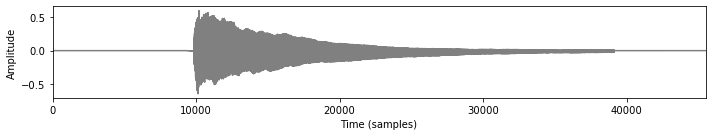

archivo WAV (dtype=int16):  Fs = 11025, x.shape = (45504,), x.dtype = int16


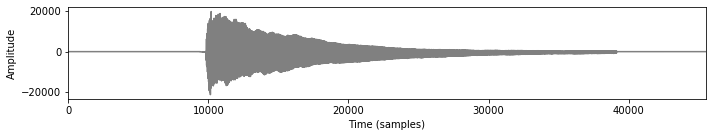

Señal post escritura (int16) y lectura (por defecto):  Fs = 11025, x.shape = (45504,), x.dtype = float64


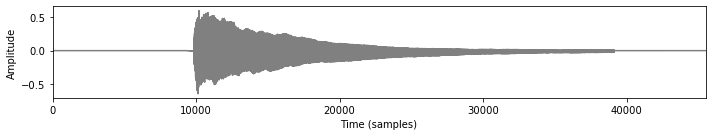

In [8]:
import soundfile as sf

# Read wav with default data type
fn_wav = os.path.join('..','data','B','FMP_B_Note-C4_Piano.wav')
x,Fs = sf.read(fn_wav)
print_plot_play(x=x,Fs=Fs,text='archivo WAV (por defecto): ')

# Read wav with data type 'int16'
fn_wav = os.path.join('..','data','B','FMP_B_Note-C4_Piano.wav')
x,Fs = sf.read(fn_wav,dtype='int16')
print_plot_play(x=x,Fs=Fs,text='archivo WAV (dtype=int16): ')

# Write signal with data type 'int16' and read with default
fn_out = os.path.join('..','output','B','FMP_B_Note-C4_Piano_int16.wav')
sf.write(fn_out,x,Fs)
x,Fs = sf.read(fn_out)
print_plot_play(x=x,Fs=Fs,text='Señal post escritura (int16) y lectura (por defecto): ')

Señal generada:  Fs = 8000, x.shape = (8000,), x.dtype = float64


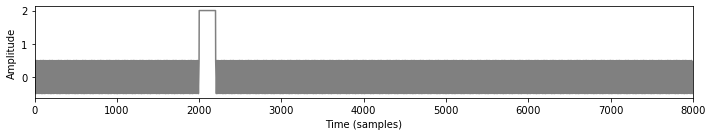

Subtipo por defecto para escritura de archivo WAV: PCM_16
Señal post escritura y lectura:  Fs = 8000, x.shape = (8000,), x.dtype = float64


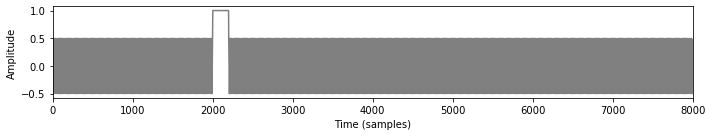

In [9]:
# Generate signal
Fs = 8000
t = np.arange(0,Fs)/Fs
x = 0.5*np.cos(2*np.pi*440*t)
x[2000:2200] = 2
print_plot_play(x=x,Fs=Fs,text='Señal generada: ')

# Write signal
print('Subtipo por defecto para escritura de archivo WAV:',sf.default_subtype('WAV'))
fn_out = os.path.join('..','output','B','FMP_B_PythonAudio_sine.wav')
sf.write(fn_out,x,Fs,subtype='PCM_16')

# Read generated signal
x,Fs = sf.read(fn_out)
print_plot_play(x=x,Fs=Fs,text='Señal post escritura y lectura: ')

## SciPy

Scipy ofrece el modulo [`scipy.io.wavfile`](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile), el cual brinda funcionalidades para lectura y escritura de archivos WAV. Sin embargo, no soporta todas las variantes del formato WAV. Por ejemplo, el tipo `24-bit integer` no esta permitido.

In [10]:
from scipy.io import wavfile

Fs,x = wavfile.read(fn_wav)

## Reproduccion de Audio Normalizado 

En el [cuaderno FMP sobre Multimedia](./B_05_Multimedia.ipynb), hemos introducido la clase `IPython.display.Audio` para la reproduccion de audio ([`IPython` version 6.0](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)). Por defecto, esta clase **normaliza** el audio (dividiendo por el maximo entre los valores de la muestra) previo a la reproduccion. 
A fin de evitar la normalizacion (lo cual permite mantener el volumen del audio en su nivel original) se ajusta el parametro `normalize=False`. Sin embargo, esto requiere que todas las muestras de audio esten dentro del rango entre $-1$ y $1$.

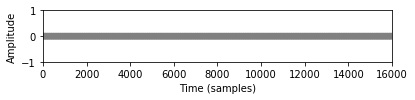

Reproduccion de audio por defecto (normalizado)


Reproduccion de audio sin normalizacion (original) 


In [11]:
Fs = 8000
t = np.arange(0,2*Fs)/Fs
x = 0.1*np.cos(2*np.pi*440*t)

plt.figure(figsize=(6,1.5))
plt.plot(x,color='gray')
plt.xlim([0,x.shape[0]])
plt.ylim([-1,1])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

print('Reproduccion de audio por defecto (normalizado)')
ipd.display(ipd.Audio(data=x,rate=Fs))

print('Reproduccion de audio sin normalizacion (original) ')
ipd.display(ipd.Audio(data=x,rate=Fs,normalize=False))

In [12]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())